# **DIVE INTO CODE COURSE**
## **U-Net**
**Student Name**: Doan Anh Tien<br>
**Student ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

### **[Problem 1] Execution of various methods**

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


**SimpleRNN Model**

In [2]:
print('Build SimpleRNN model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
simple_srnn_score, simple_srnn_acc = model.evaluate(x_test, y_test,
                                                    batch_size=batch_size)
print('Test score:', simple_srnn_score)
print('Test accuracy:', simple_srnn_acc)

Build SimpleRNN model...
Train...
Epoch 1/5
782/782 [==============================] - 145s 182ms/step - loss: 0.6859 - accuracy: 0.5464 - val_loss: 0.7741 - val_accuracy: 0.5154
Epoch 2/5
782/782 [==============================] - 137s 176ms/step - loss: 0.5987 - accuracy: 0.6690 - val_loss: 0.7565 - val_accuracy: 0.6386
Epoch 3/5
782/782 [==============================] - 140s 179ms/step - loss: 0.4633 - accuracy: 0.7835 - val_loss: 0.5048 - val_accuracy: 0.7818
Epoch 4/5
782/782 [==============================] - 136s 174ms/step - loss: 0.5098 - accuracy: 0.7502 - val_loss: 0.5789 - val_accuracy: 0.7027
Epoch 5/5
782/782 [==============================] - 9s 12ms/step - loss: 0.5663 - accuracy: 0.7080
Test score: 0.5663231611251831
Test accuracy: 0.7079600095748901


**GRU**

In [5]:
print('Build LSTM model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
gru_score, gru_acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', gru_score)
print('Test accuracy:', gru_acc)

Build LSTM model...
Train...
Epoch 1/5
782/782 [==============================] - 28s 31ms/step - loss: 0.4432 - accuracy: 0.7856 - val_loss: 0.3553 - val_accuracy: 0.8399
Epoch 2/5
782/782 [==============================] - 23s 29ms/step - loss: 0.2346 - accuracy: 0.9075 - val_loss: 0.3702 - val_accuracy: 0.8375
Epoch 3/5
782/782 [==============================] - 22s 28ms/step - loss: 0.1314 - accuracy: 0.9524 - val_loss: 0.4324 - val_accuracy: 0.8383
Epoch 4/5
782/782 [==============================] - 23s 29ms/step - loss: 0.0698 - accuracy: 0.9752 - val_loss: 0.5943 - val_accuracy: 0.8251
Epoch 5/5
782/782 [==============================] - 7s 8ms/step - loss: 0.7912 - accuracy: 0.8246
Test score: 0.7911760210990906
Test accuracy: 0.8245999813079834


**LSTM**

In [7]:
print('Build LSTM model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
lstm_score, lstm_acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

print('Test score:', lstm_score)
print('Test accuracy:', lstm_acc)

Build LSTM model...
Train...
Epoch 1/5
782/782 [==============================] - 30s 36ms/step - loss: 0.4226 - accuracy: 0.8038 - val_loss: 0.3796 - val_accuracy: 0.8324
Epoch 2/5
782/782 [==============================] - 30s 38ms/step - loss: 0.2496 - accuracy: 0.8981 - val_loss: 0.4041 - val_accuracy: 0.8332
Epoch 3/5
782/782 [==============================] - 21s 27ms/step - loss: 0.1607 - accuracy: 0.9389 - val_loss: 0.4496 - val_accuracy: 0.8316
Epoch 4/5
782/782 [==============================] - 22s 28ms/step - loss: 0.1026 - accuracy: 0.9630 - val_loss: 0.5244 - val_accuracy: 0.8235
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.6256 - accuracy: 0.8164
Test score: 0.625643789768219
Test accuracy: 0.8163599967956543


**ConvLSTM2D**

Epoch 1/50
95/95 [==============================] - 154s 2s/step - loss: 0.8488 - val_loss: 0.7459
Epoch 2/50
95/95 [==============================] - 146s 2s/step - loss: 0.7831 - val_loss: 0.7710
Epoch 3/50
95/95 [==============================] - 146s 2s/step - loss: 0.7334 - val_loss: 0.7587
Epoch 4/50
95/95 [==============================] - 146s 2s/step - loss: 0.7002 - val_loss: 0.7438
Epoch 5/50
95/95 [==============================] - 146s 2s/step - loss: 0.6771 - val_loss: 0.7676
Epoch 6/50
95/95 [==============================] - 146s 2s/step - loss: 0.6589 - val_loss: 0.7561
Epoch 7/50
95/95 [==============================] - 146s 2s/step - loss: 0.6434 - val_loss: 0.6889
Epoch 8/50
95/95 [==============================] - 146s 2s/step - loss: 0.6296 - val_loss: 0.6476
Epoch 9/50
95/95 [==============================] - 146s 2s/step - loss: 0.6169 - val_loss: 0.6233
Epoch 10/50
95/95 [==============================] - 145s 2s/step - loss: 0.6048 - val_loss: 0.6081
Epoch 11/

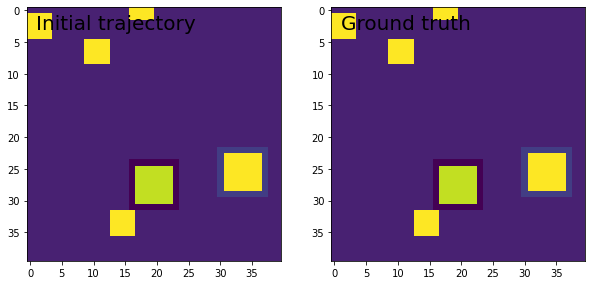

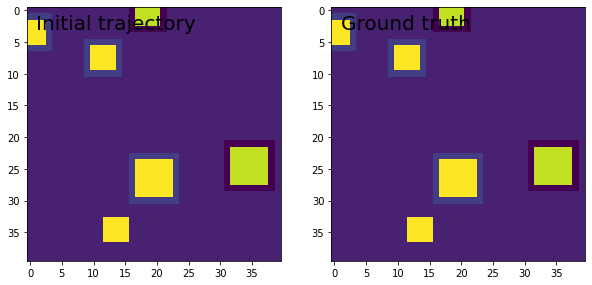

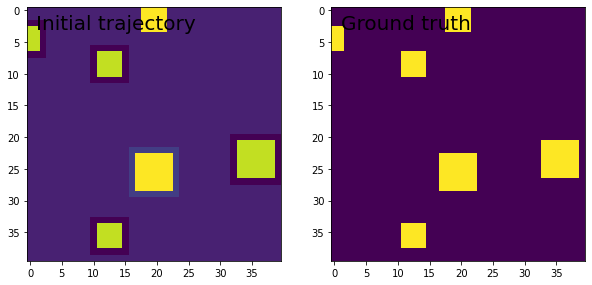

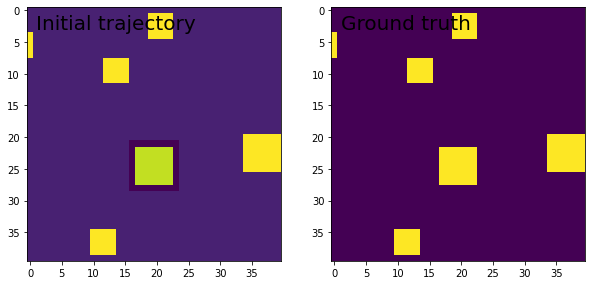

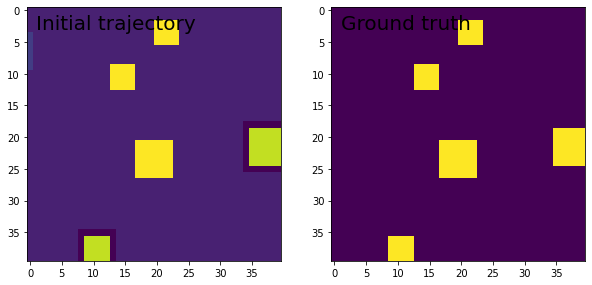

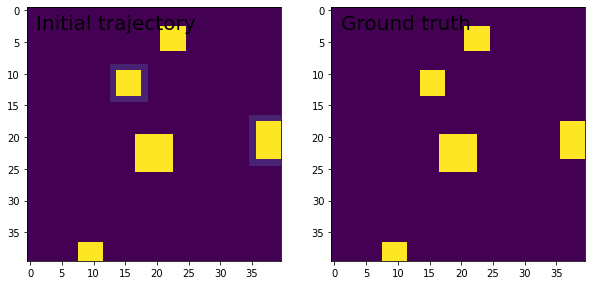

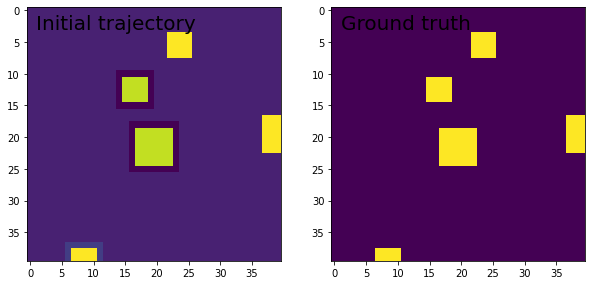

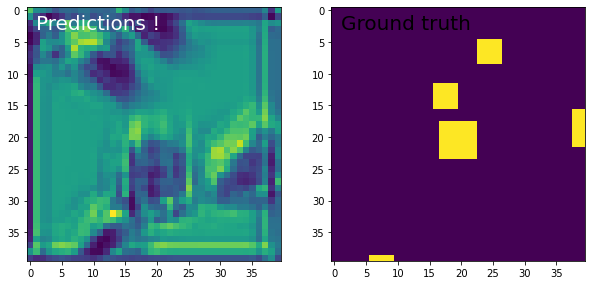

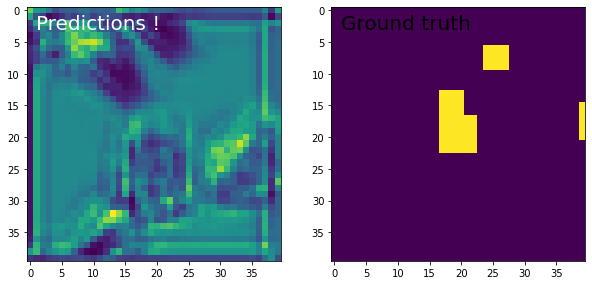

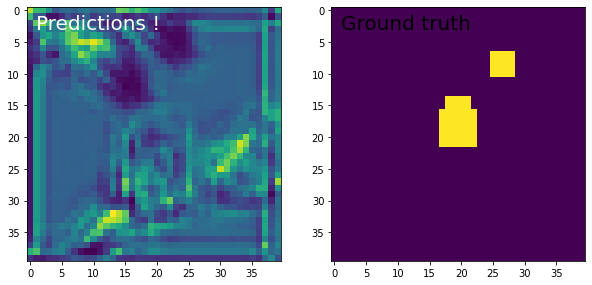

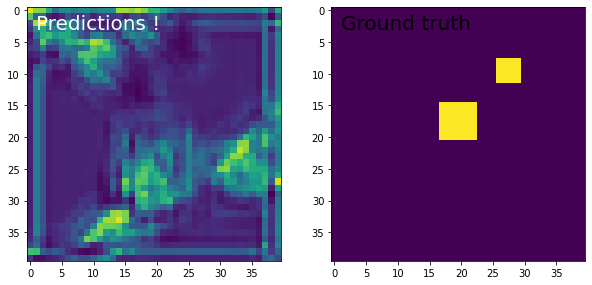

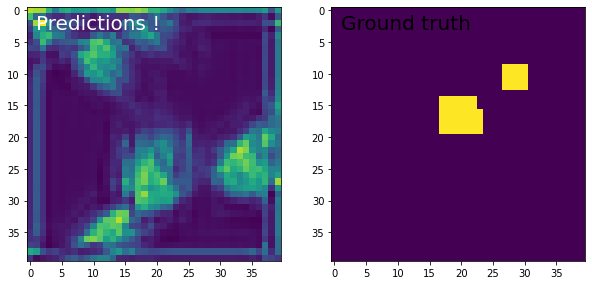

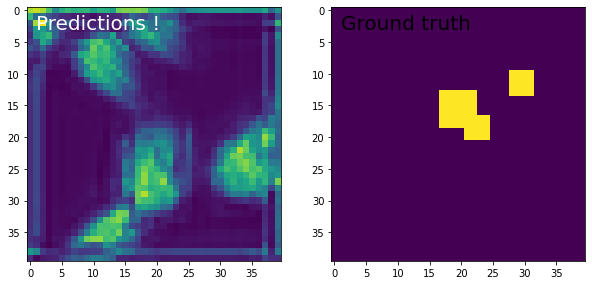

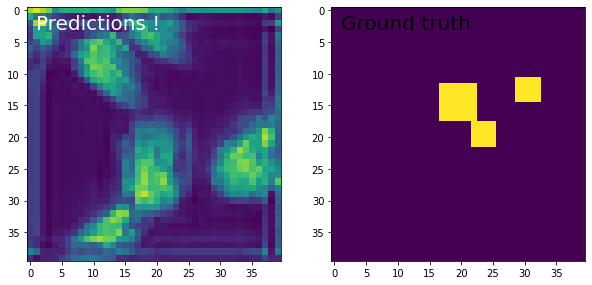

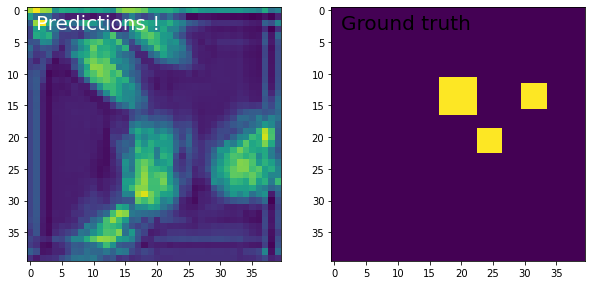

In [29]:
""" This script demonstrates the use of a convolutional LSTM network.

This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=50, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

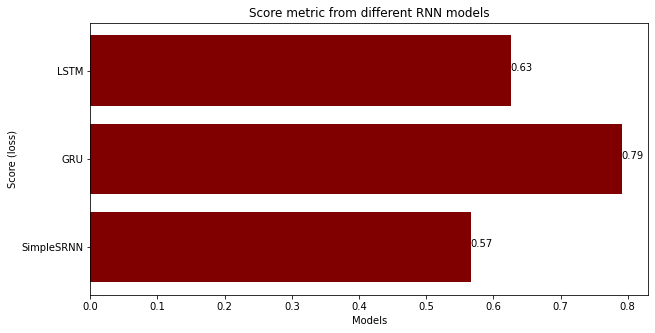

In [38]:
import matplotlib.pyplot as plt

model = ['SimpleSRNN', 'GRU', 'LSTM', 'ConvLSTM2D']
score_list = [simple_srnn_score, gru_score, lstm_score]
acc_list = [simple_srnn_acc, gru_acc, lstm_acc]

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(model, score_list, color ='maroon')
 
plt.xlabel("Models")
plt.ylabel("Score (loss)")
plt.title("Score metric from different RNN models")

for index, value in enumerate(score_list):
    plt.text(value, index, str(round(value, 2)))
  
plt.show()

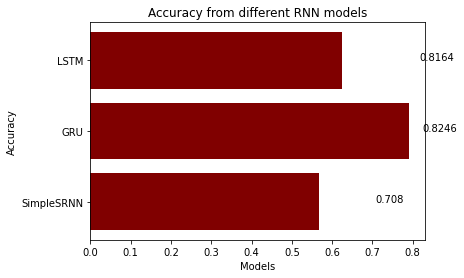

In [41]:
# creating the bar plot
plt.barh(model, score_list, color ='maroon')
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy from different RNN models")

for index, value in enumerate(acc_list):
    plt.text(value, index, str(round(value, 4)))

plt.show()

### **[Problem 3] Explanation of other classes**

There are other related classes listed in the documentation. Please explain what they are. Some of these classes are rarely used in practice.

* RNN: The neural network that specifically looping the data with certain states, and it updates the lastest data while also recording the past data. Recurrent Neural Nwetwork is suitable for time-series data.

* SimpleRNNCell: Unlike RNN layers, which processes whole batches of input sequences, the RNN cell only processes a single timestep. The cell is the inside of the for loop of a RNN layer. Wrapping a cell inside a keras.layers.RNN layer gives us a layer capable of processing batches of sequences

* GRUCell: Similarly to SimpleRNNCell, but is also supports GRU layers. There is no option for the return value of sequences, only one timestamp is calculated and returned.

* LSTMCell: Cell class of the LSTM layer. This class processes one step of the entire time sequence input. Receives the input data with batch size and input dimension as an argument.

* StackedRNNCells: A wrapper that allows a stack of RNN cells to behave as a single cell. Used to implement an efficient stacked RNN.

* CuDNNGRU: High-speed GRU implementation using CuDNN. Only works on the GPU with the TensorFlow backend (import keras.backend)

* CuDNNLSTM: A high-speed LSTM implementation using CuDNN. Only works on the GPU with the TensorFlow backend. The cuDNNLSTM can change the size of the buffer between generations, so weights and biases must be preserved and used